### Covid-19 Visualization Project

This data was obtained from the "Coronavirus Pandemic (Covid-19)" dataset available at https://ourworldindata.org/coronavirus.  

In this notebook, I will begin by trying to analyze the data at a global scale and will try to understand things such as what factors led to higher total cases, higher death rates, and a greater percentage of the population being infected. 

To begin, I used PostgreSQL to select the data initially included in this analysis.  Values for fields such as total_cases and people_fully_vaccinated were aggregated to show the maximum value for each field.  Stringency_index was aggregated to show the average value throughout the pandemic for each country.  Fields such as death_percentage and total_percent_of_population_infected were calculated using SQL to show the percentage of people that passed away of the total percent of people infected and the percent of the populaiton infected respectively. I also calculated a field, total_percent_of_population_vaccinated to show the percent of population vaccinated following the initial vaccine protocols prescribed.  I also removed non-valid location data such as aggregated continent data in Excel before saving the file as a .csv file.  


In [31]:
#imports
 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

%matplotlib inline

In [7]:
#reading csv file into the dataframe

df = pd.read_csv("Covid Project Data.csv")

In [8]:
df.head()

,location,date,total_cases,death_percentage,total_percent_of_population_infected,total_percent_of_population_vaccinated,avg_stringency_index,population,population_density,median_age,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,handwashing_facilities
0,Afghanistan,4/5/22,177932.0,4.31,0.45,11.38,35.542386,39835428.0,54.422,18.6,1803.987,597.029,9.59,NaN,NaN,64.83,37.746
1,Albania,4/5/22,274000.0,1.27,9.54,42.42,55.932109,2872934.0,104.871,38.0,11803.431,304.195,10.08,7.1,51.2,78.57,NaN
2,Algeria,4/5/22,265699.0,2.59,0.60,13.70,63.866882,44616626.0,17.348,29.1,13913.839,278.364,6.73,0.7,30.4,76.88,83.741
3,Andorra,4/5/22,40024.0,0.39,51.74,68.99,46.834266,77354.0,163.755,NaN,NaN,109.135,7.97,29.0,37.8,83.73,NaN
4,Angola,4/5/22,99194.0,1.92,0.29,17.66,64.801156,33933611.0,23.890,16.8,5819.495,276.045,3.94,NaN,NaN,61.15,26.664


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   location                                229 non-null    object 
 1   date                                    229 non-null    object 
 2   total_cases                             216 non-null    float64
 3   death_percentage                        209 non-null    float64
 4   total_percent_of_population_infected    216 non-null    float64
 5   total_percent_of_population_vaccinated  218 non-null    float64
 6   avg_stringency_index                    186 non-null    float64
 7   population                              228 non-null    float64
 8   population_density                      212 non-null    float64
 9   median_age                              194 non-null    float64
 10  gdp_per_capita                          196 non-null    float6

In [10]:
df.describe()

,total_cases,death_percentage,total_percent_of_population_infected,total_percent_of_population_vaccinated,avg_stringency_index,population,population_density,median_age,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,life_expectancy,handwashing_facilities
count,2.160000e+02,209.000000,216.000000,218.000000,186.000000,2.280000e+02,212.000000,194.000000,196.00000,194.000000,205.000000,147.000000,145.000000,225.000000,96.000000
mean,4.571091e+06,1.480478,13.522454,51.373257,53.778680,6.896052e+07,446.175929,30.411340,19173.61226,263.871247,8.583317,10.790027,32.909897,73.545333,50.788844
std,3.423200e+07,1.668243,14.637909,26.715045,12.046468,5.372726e+08,2064.736270,9.080947,20368.19385,121.790907,4.954873,10.816286,13.621757,7.448094,32.124848
min,1.000000e+00,0.040000,0.000000,0.080000,10.470339,4.700000e+01,0.137000,15.100000,661.24000,79.370000,0.990000,0.100000,7.700000,53.280000,1.188000
25%,2.683175e+04,0.600000,1.157500,29.792500,47.066689,5.573308e+05,37.624000,22.225000,4126.52100,172.387500,5.460000,1.900000,22.600000,69.020000,20.482000
50%,2.226510e+05,1.090000,8.590000,57.930000,53.462826,5.735160e+06,87.724500,29.650000,12595.25550,244.312500,7.210000,6.300000,33.100000,75.000000,49.690500
75%,1.125239e+06,1.990000,20.642500,72.567500,63.431994,2.208673e+07,216.400500,38.700000,27341.79575,332.934500,10.790000,19.200000,41.300000,78.950000,82.686750
max,4.936776e+08,18.150000,70.650000,122.610000,76.474464,7.874966e+09,20546.766000,48.200000,116935.60000,724.417000,30.530000,44.000000,78.100000,86.750000,100.000000


## What countries were most effected by the pandemic?

In [36]:
#Choropleth map showing countries with a higher percentage of thier populations infected
fig = px.choropleth(df, locations='location',
                    locationmode="country names", color='total_percent_of_population_infected', scope="world")
 
fig.show()

In [37]:
#choropleth map showing countries with higher death percentages

fig = px.choropleth(df, locations='location',
                    locationmode="country names", color='death_percentage', scope="world")
 
fig.show()

## What factors are correlated?

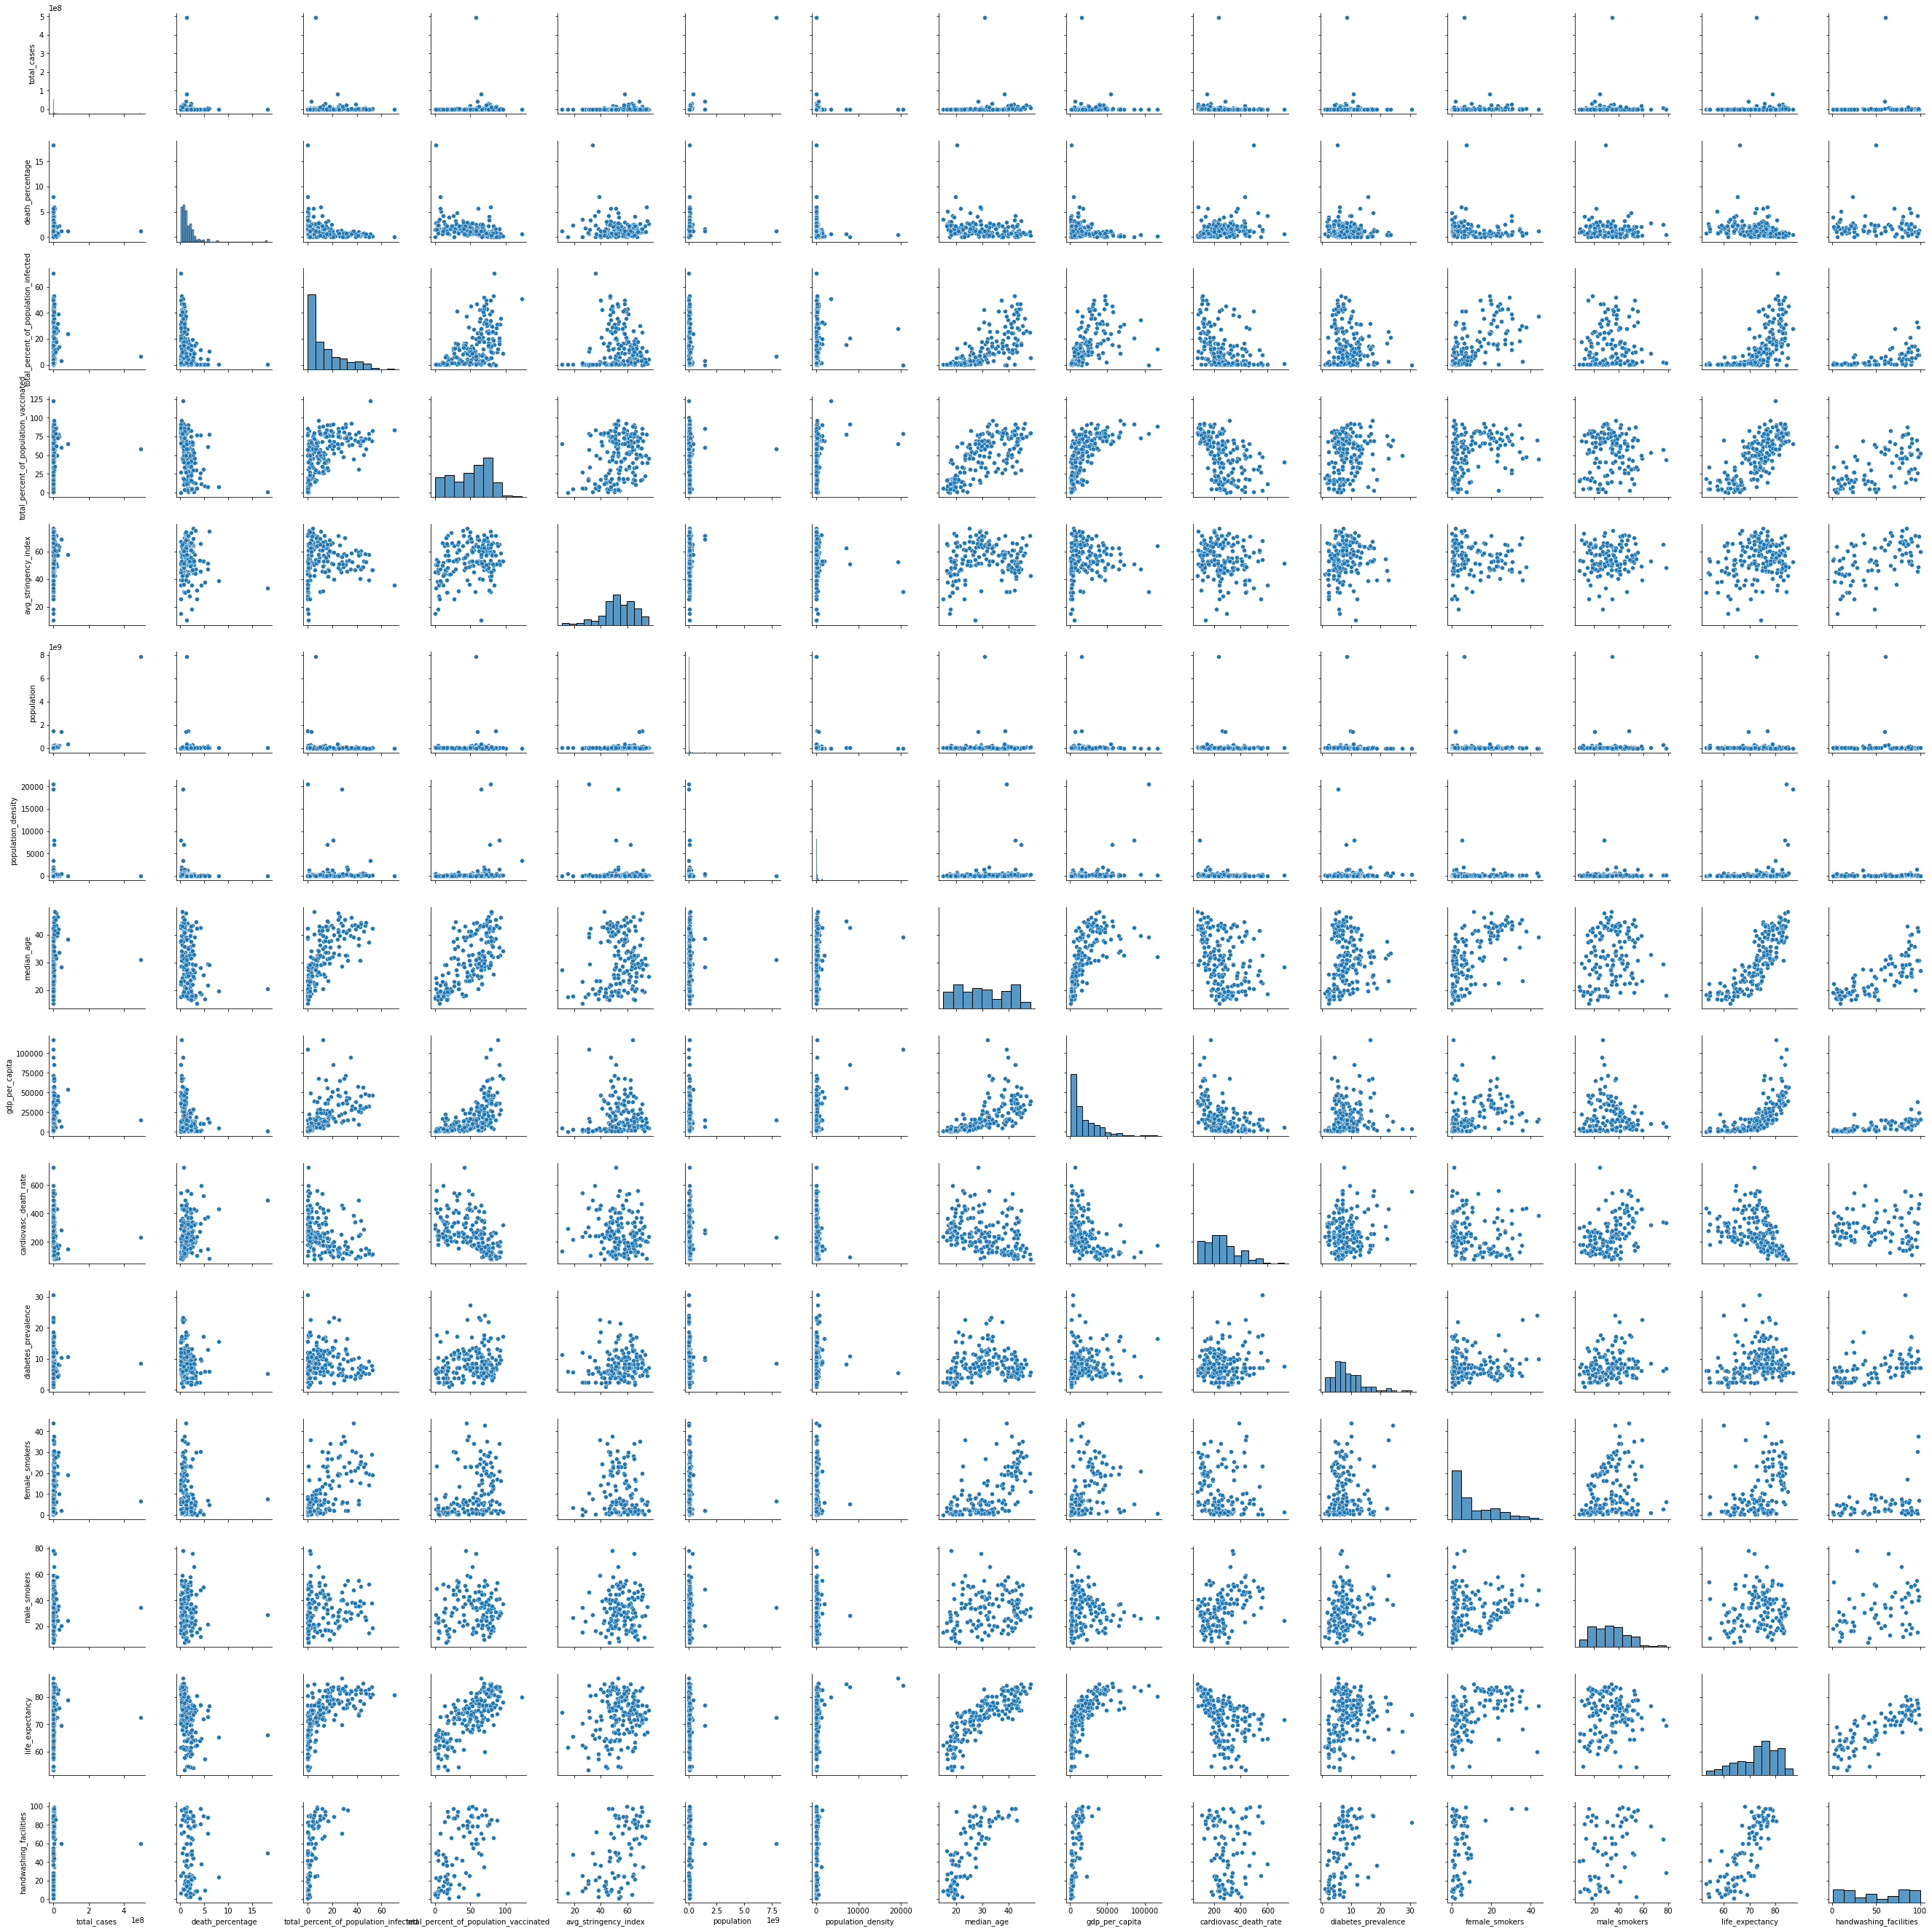

In [11]:
# pairplot to show some quick correlations between values
sns.pairplot(df)

<AxesSubplot:>

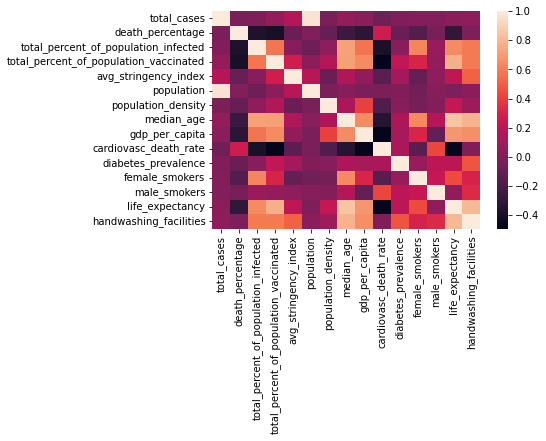

In [12]:
#heatmap to show correlations

sns.heatmap(df.corr())

A quick analysis of the heatmap above shows us that total_cases exhibits a strong correlation to population as expected.  There is a weaker correlation to avg_stringency_index. 

Death_percentage (the percent of people infected with coronovirus who passed away) does not exhibit any strong positive correlations with other variables accounted for in this dataset, but is weakly correlated to cardiovasc_death_rate (death rate from cardiovascular diseases in 2017).  However, death_percentage does exhibit moderate negative correlations to the total_percent_of_population_infected, total_percent_of_population_vaccinated, median_age, gdp_per_capita, and life_expectancy.  

Total_percent_of_population_infected exhibits strong correlations to median_age, gdp_per_capita, female_smokers, life_expectancy, and handwashing_facilities.  There are moderate negative correlations to death_percentage and cardiovasc_death_rate.  

## How does gdp_per_capita relate to covid cases and deaths?

GDP per capita is often used as a proxy for standard of living and can be used to help determine how a country's economic status determined how it fared during the pandemic.

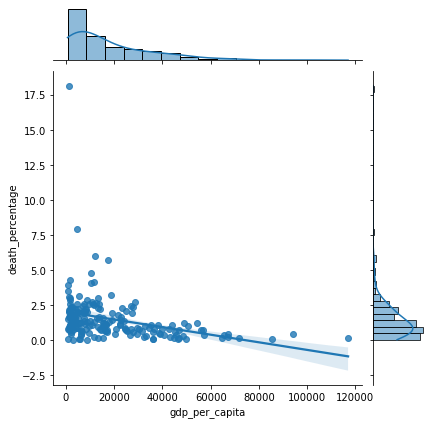

In [13]:
sns.jointplot(x = 'gdp_per_capita', y = 'death_percentage', data = df, kind = 'reg')

In [14]:
df['gdp_per_capita'].corr(df['death_percentage'])

-0.3171847591471511

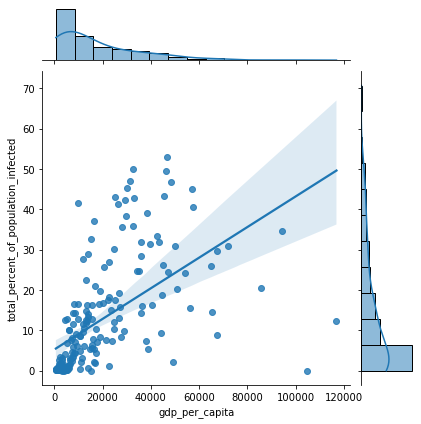

In [15]:
sns.jointplot(x = 'gdp_per_capita', y = 'total_percent_of_population_infected', data = df, kind = 'reg')

In [16]:
df['gdp_per_capita'].corr(df['total_percent_of_population_infected'])

0.5683437608459918

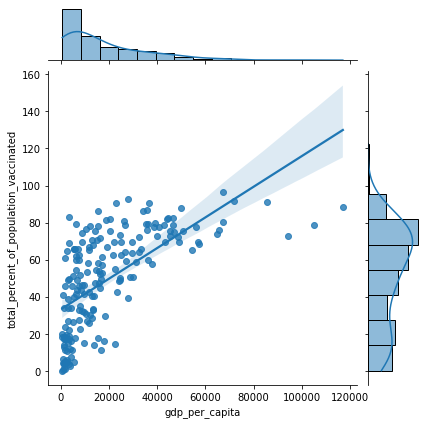

In [20]:
sns.jointplot(x = 'gdp_per_capita', y = 'total_percent_of_population_vaccinated', data = df, kind = 'reg')

In [21]:
df['gdp_per_capita'].corr(df['total_percent_of_population_vaccinated'])

0.6422147727489071

It appears that gdp_per_capita exhibits a weak negative correlation to death_percentage and a strong positive correlation to total_percent_of_population_infected.  My hypothesis is that this may be due to greater access to tests in countries where the population has greater economic means, but more research would be needed to verify that this is true.  

Additionally, gdp_per_capita is moderately correlated to the total_percent_of_population_vaccinated which indicates that people in more wealthy countries may have greater access to vaccines.  

## How do vaccination rates relate to covid cases and deaths?

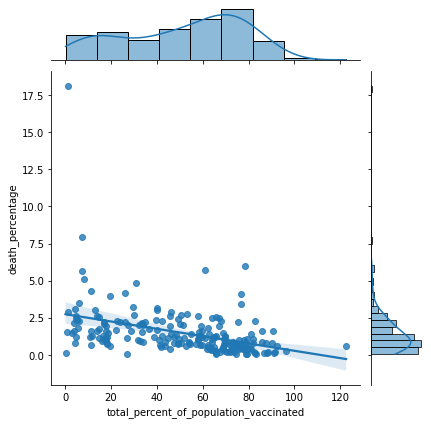

In [25]:
sns.jointplot(x = 'total_percent_of_population_vaccinated', y = 'death_percentage', data = df, kind = 'reg')

In [26]:
df['death_percentage'].corr(df['total_percent_of_population_vaccinated'])

-0.39493202437058983

In [ ]:
Death percentage exhibits a moderate negative correlation to the total_percent_of_population_vaccinated. 

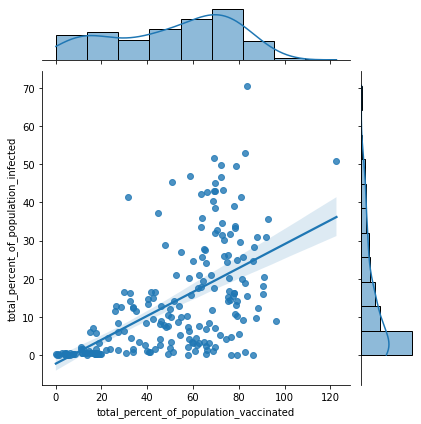

In [22]:
sns.jointplot(x = 'total_percent_of_population_vaccinated', y = 'total_percent_of_population_infected', data = df, kind = 'reg')

In [23]:
df['total_percent_of_population_infected'].corr(df['total_percent_of_population_vaccinated'])

0.5732192926893529

There is moderate correlation between the total_percent_of_population_infected and percent_of_population_fully_vaccinated.  Vaccines were not widely available until later in the pandemic which may explain the more moderate correlation versus a stronger correlation coeffecient.

## How does stringency effect covid case rates?

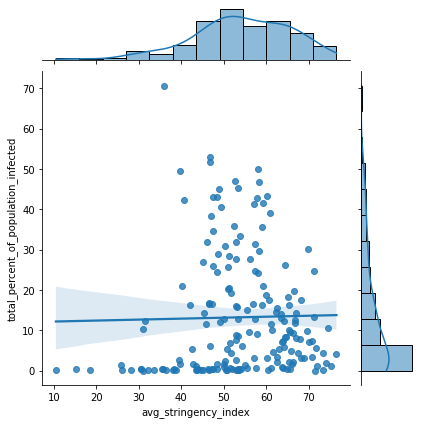

In [28]:
sns.jointplot(x = 'avg_stringency_index', y = 'total_percent_of_population_infected', data = df, kind = 'reg')

In [30]:
df['avg_stringency_index'].corr(df['total_percent_of_population_vaccinated'])

0.27633573208778817

There appeaars to be a weak correlation between avg_stringency_index and the percentage of the population infected.  More analysis would be needed to determine how stringency effected the course of the pandemic as the stringency value used in this calculation is only an average and stringency values assigned may be somewhat subjective.